# COMP1117: Computer programming - Tutorial 1

Welcome to the first tutorial session for COMP1117 1B!

---

## About us (STAs)

- Yang Haozhe (Thomas): Fourth-year Computer Science Student (BEng(CompSc)). Here is [my personal page](https://linearalgebrayhz.github.io/).
    - Contact: yhz2004@connect.hku.hk
- 

## About You

### Which Faculty do you come from?

[Link for the questions](https://www.menti.com/alvhs9wtwuh7)

*It can cause confusion for students in school of Computing and Data Science to determine their faculty. For CDS, SDS, BSc(Ac) and BASc(Fintech), BAsc(AppliedAI) students you can choose School of Computing and Data Science*

### What is your current year of study?

---

## 1. Tutorial Arrangements
The first tutorial session will be conducted online. 

Starting from the third week (9.22-9.28), we will have face to face tutorial sessions:

- **Tuesday 11:00 - 12:50**
- Venue: **HW311** located in Wong Haking building 3F

*Should you find it hard to locate the classroom, please do not hesitate to contact us for assistance*

---

In each tutorial, we will
- Recap the material covered during lecture (very quick recap on difficult/important concepts, possibly with some extended learning).
- Go through tutorial slides provided by the teaching team and tutorial exercises
- (optionally) teach bonus knowledge on Python, Programming and Computer Science if time permits
- Have Q&A time


---
(**Important**)
The tutorial exercises submission deadline will be next Friday 23:59 of the tutorial class, for example:
- Sep 15 - 19 T1 tutorial class
- Sep 26 (Friday) 23:59 T1 exercises due
- Late work is NOT accepted
- Tutorial worksheet submission counts towards your course assessment


## 2. Life is Short, I Use Python 🐍

As a Year 4 CS student, I’ve seen Python being used **everywhere** — from research to industry, and across many disciplines.  
It’s not just an “introductory language” — it’s a **gateway language**: easy to learn, but powerful because of its massive ecosystem of specialized packages. It’s a tool you’ll carry with you along the academic and career path.


### Quick Comparison Between Python, C++ and Java

In Python, we say:
```python
print("Hello World!")
````

---

In C++, we say:

```cpp
#include<iostream>

int main(int argc, char *argv[]){
    std::cout << "Hello World" << std::endl;
}
```

---

In Java, we say:

```java
public class HelloWorld {
    public static void main(String[] args) {
        System.out.println("Hello World");
    }
}
```

👉 Notice how **Python is concise and beginner-friendly**, but still powerful enough for serious applications.

---

### Widely-used Python (Across Disciplines)

- Computer Science / AI / Data Science → `numpy`, `pandas`, `scikit-learn`, `tensorflow`, `pytorch`

- Finance & Economics → `pandas` (time-series), `statsmodels` (econometrics), `quantlib`

- Bioinformatics → `biopython`, `scipy`, `pytorch` (for genomics/AI in biology)

- Mathematics & Statistics → `numpy`, `scipy`, `sympy`, `statsmodels`

- Computational Social Science → `networkx` (graph analysis), `nltk`/`spacy` (text analysis), `pandas`

**Key Message: You won’t be tested on these packages in this course.**

But the fundamentals you learn in COMP1117 (variables, loops, functions, data structures) will give you the foundation to pick up any of these later.


**To run the following examples, run next two cells first to install necessary packages.** It will take sometime to run.

In [1]:
!pip install numpy matplotlib scipy taichi


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import taichi as ti

[Taichi] version 1.7.4, llvm 15.0.1, commit b4b956fd, win, python 3.10.11


### Example 1: Plotting in Python

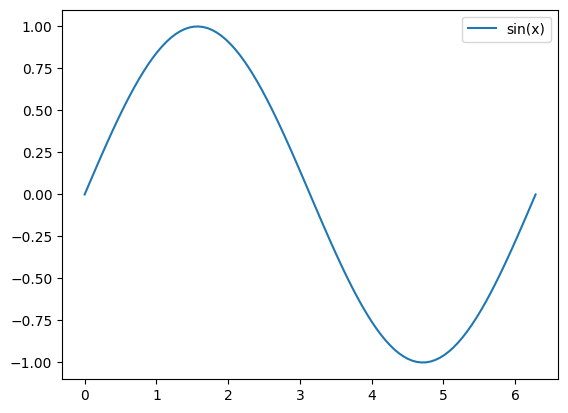

In [3]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

plt.plot(x, y, label="sin(x)")
plt.legend()
plt.show()


🔍 In just a few lines, you can make clean plots for math/physics/AI assignments.

---

### Example 2: Scientific Computing

In [4]:
# Define the coefficient matrix A
A = np.array([[2, 3, -1, 4],
              [1, -2, 5, -1],
              [4, 1, -2, 3],
              [-1, 5, 3, -2]])

# Define the constant vector b
b = np.array([12, -5, 10, 7])

# Solve the system of linear equations
x = np.linalg.solve(A, b)

# Print the solution
print("Solution vector x:")
print(x)

Solution vector x:
[ 1.31351351  2.10810811 -0.28108108  0.69189189]



Some python packages lets you solve **linear algebra problems** without writing complicated algorithms and provide high robustness.

---

### Example 3: Particle Simulation (with Taichi)


In [ ]:
import taichi as ti
ti.init(arch=ti.gpu)  # Alternatively, ti.init(arch=ti.cpu)

n = 128
quad_size = 1.0 / n
dt = 4e-2 / n
substeps = int(1 / 60 // dt)

gravity = ti.Vector([0, -9.8, 0])
spring_Y = 3e4
dashpot_damping = 1e4
drag_damping = 1

ball_radius = 0.3
ball_center = ti.Vector.field(3, dtype=float, shape=(1, ))
ball_center[0] = [0, 0, 0]

x = ti.Vector.field(3, dtype=float, shape=(n, n))
v = ti.Vector.field(3, dtype=float, shape=(n, n))

num_triangles = (n - 1) * (n - 1) * 2
indices = ti.field(int, shape=num_triangles * 3)
vertices = ti.Vector.field(3, dtype=float, shape=n * n)
colors = ti.Vector.field(3, dtype=float, shape=n * n)

bending_springs = False

@ti.kernel
def initialize_mass_points():
    random_offset = ti.Vector([ti.random() - 0.5, ti.random() - 0.5]) * 0.1

    for i, j in x:
        x[i, j] = [
            i * quad_size - 0.5 + random_offset[0], 0.6,
            j * quad_size - 0.5 + random_offset[1]
        ]
        v[i, j] = [0, 0, 0]


@ti.kernel
def initialize_mesh_indices():
    for i, j in ti.ndrange(n - 1, n - 1):
        quad_id = (i * (n - 1)) + j
        # 1st triangle of the square
        indices[quad_id * 6 + 0] = i * n + j
        indices[quad_id * 6 + 1] = (i + 1) * n + j
        indices[quad_id * 6 + 2] = i * n + (j + 1)
        # 2nd triangle of the square
        indices[quad_id * 6 + 3] = (i + 1) * n + j + 1
        indices[quad_id * 6 + 4] = i * n + (j + 1)
        indices[quad_id * 6 + 5] = (i + 1) * n + j

    for i, j in ti.ndrange(n, n):
        if (i // 4 + j // 4) % 2 == 0:
            colors[i * n + j] = (0.22, 0.72, 0.52)
        else:
            colors[i * n + j] = (1, 0.334, 0.52)

initialize_mesh_indices()

spring_offsets = []
if bending_springs:
    for i in range(-1, 2):
        for j in range(-1, 2):
            if (i, j) != (0, 0):
                spring_offsets.append(ti.Vector([i, j]))

else:
    for i in range(-2, 3):
        for j in range(-2, 3):
            if (i, j) != (0, 0) and abs(i) + abs(j) <= 2:
                spring_offsets.append(ti.Vector([i, j]))

@ti.kernel
def substep():
    for i in ti.grouped(x):
        v[i] += gravity * dt

    for i in ti.grouped(x):
        force = ti.Vector([0.0, 0.0, 0.0])
        for spring_offset in ti.static(spring_offsets):
            j = i + spring_offset
            if 0 <= j[0] < n and 0 <= j[1] < n:
                x_ij = x[i] - x[j]
                v_ij = v[i] - v[j]
                d = x_ij.normalized()
                current_dist = x_ij.norm()
                original_dist = quad_size * float(i - j).norm()
                # Spring force
                force += -spring_Y * d * (current_dist / original_dist - 1)
                # Dashpot damping
                force += -v_ij.dot(d) * d * dashpot_damping * quad_size

        v[i] += force * dt

    for i in ti.grouped(x):
        v[i] *= ti.exp(-drag_damping * dt)
        offset_to_center = x[i] - ball_center[0]
        if offset_to_center.norm() <= ball_radius:
            # Velocity projection
            normal = offset_to_center.normalized()
            v[i] -= min(v[i].dot(normal), 0) * normal
        x[i] += dt * v[i]

@ti.kernel
def update_vertices():
    for i, j in ti.ndrange(n, n):
        vertices[i * n + j] = x[i, j]

window = ti.ui.Window("Taichi Cloth Simulation on GGUI", (1024, 1024),
                      vsync=True)

canvas = window.get_canvas()
canvas.set_background_color((1, 1, 1))
scene = window.get_scene()
camera = ti.ui.Camera()

current_t = 0.0
initialize_mass_points()

while window.running:
    if current_t > 1.5:
        # Reset
        initialize_mass_points()
        current_t = 0

    for i in range(substeps):
        substep()
        current_t += dt
    update_vertices()

    camera.position(0.0, 0.0, 3)
    camera.lookat(0.0, 0.0, 0)
    scene.set_camera(camera)
    
    scene.point_light(pos=(0, 1, 2), color=(1, 1, 1))
    scene.ambient_light((0.5, 0.5, 0.5))
    scene.mesh(vertices,
               indices=indices,
               per_vertex_color=colors,
               two_sided=True)

    # Draw a smaller ball to avoid visual penetration
    scene.particles(ball_center, radius=ball_radius * 0.95, color=(0.5, 0.42, 0.8))
    canvas.scene(scene)
    window.show()

[Taichi] Starting on arch=cuda


: 


With Taichi, Python can run **high-performance simulations** (physics, graphics, AI research).

---

### 😂 Python Meme Corner

<img src="assets/How2Learn.jpg" alt="how to learn C++ and python"  width="200"/>
<img src="assets/slowPython.jpg" alt="Python is slow"  width="200"/>
<img src="assets/slowPython2.jpg" alt="Python is slow but fast"  width="200"/>


---

**Takeaway**:

Python is a **gateway language** — easy to start, powerful enough for advanced CS, and widely used in academia and industry.

## 3. Recapping Lecture materials

In the previous lectures, we covered:
1. Values and variables
- `bool`, `int`, `float`, `str`

**Bonus: interesting floating numbers**

[Floating-Point Arithmetic: Issues and Limitations](https://docs.python.org/3/tutorial/floatingpoint.html)

Float Point representation in machines:

$$(-1)^{\text{sign}} \times (0.d_1d_2d_3...d_n)_2 \times 2^{\text{exponent}}$$ for $$d_i \in \set{0, 1}, d_1 \neq 0$$

In [ ]:
a_float_number = 0.1 + 0.001325
print(a_float_number)

print("---Compare using == (error-prone)---")
print(0.1 + 0.1 + 0.1 == 0.3)

print("---using some functions from other packages---")
import math
print(math.isclose(0.1 + 0.1 + 0.1, 0.3)) 

print("---using a absolute difference--")
epsilon = 1e-10
print(abs((0.1 + 0.1 + 0.1) - 0.3) < epsilon)

large_number = 1e5

0.10132500000000001
---Compare using == (error-prone)---
False
---using some functions from other packages---
True
---using a absolute difference--
True


- Rules for naming a variable, reserved words and other keywords for built-in functions

**Bonus: Naming conventions, CamelCase naming and python style naming** 

[CamelCase Naming Convention](https://en.wikipedia.org/wiki/Camel_case)

Such as iPhone & iPad XD

Python Programmers also use underscore _ as separator in names.

A code snippet from one of my projects.
```python
    if is_camera_dataset:
        train_loader = DataLoader(train_dataset, batch_size=opt.batch_size, drop_last=True, num_workers=4,
                                  shuffle=True, pin_memory=True, collate_fn=collate_fn_camera)
        val_loader = DataLoader(val_dataset, batch_size=opt.batch_size, drop_last=True, num_workers=4,
                                shuffle=True, pin_memory=True, collate_fn=collate_fn_camera)
    else:
        train_loader = DataLoader(train_dataset, batch_size=opt.batch_size, drop_last=True, num_workers=4,
                                  shuffle=True, pin_memory=True)
        val_loader = DataLoader(val_dataset, batch_size=opt.batch_size, drop_last=True, num_workers=4,
                                shuffle=True, pin_memory=True)
```

In [9]:
import keyword
print(keyword.kwlist)

float_1 = 1.01
print(int(float_1))

['False', 'None', 'True', 'and', 'as', 'assert', 'async', 'await', 'break', 'class', 'continue', 'def', 'del', 'elif', 'else', 'except', 'finally', 'for', 'from', 'global', 'if', 'import', 'in', 'is', 'lambda', 'nonlocal', 'not', 'or', 'pass', 'raise', 'return', 'try', 'while', 'with', 'yield']
1


- type casting
2. Taking input with `input`

3. Sequence of values: `list`, `tuple`, `set`, `dict`

More generally, python have a handful of `collections` datatype or `containers`.

Recap in-class exercise: How to create a 3x3 table?

In [11]:

T_1=[[0,0,0],[0,0,0],[0,0,0]]

T_2=[]
empty_list = [0,0,0]
T_2.append(empty_list)
T_2.append(empty_list)
T_2.append(empty_list)

print(T_2)

empty_list[1] = 1

print(T_2)



[[0, 0, 0], [0, 0, 0], [0, 0, 0]]
[[0, 1, 0], [0, 1, 0], [0, 1, 0]]


In [12]:
boo = 1
foo = boo

print("id of foo:", id(foo))
print("id of boo:", id(boo))

foo += 1
print("id of foo after modification:", id(foo))

print(foo is boo)
print()

original_list = [1, 2, 3]
copied_list = original_list

print("id of original_list:", id(original_list))
print("id of copied_list:", id(copied_list))

copied_list.append(4)
print("id of copied_list after modification:", id(copied_list))
print("original_list after copied_list is modified:", original_list)
print(original_list is copied_list)


id of foo: 2638120550640
id of boo: 2638120550640
id of foo after modification: 2638120550672
False

id of original_list: 2638218157120
id of copied_list: 2638218157120
id of copied_list after modification: 2638218157120
original_list after copied_list is modified: [1, 2, 3, 4]
True


**Bonus: [Python Mutable vs. Immutable Objects](https://www.geeksforgeeks.org/python/mutable-vs-immutable-objects-in-python/)**

4. Expressions: operators and operands
- Arithmetic, relational, logical operations and membership test.
- Precedence of operators

5. Special Characters, r/f-trings, print with `sep` or `end`

**Bonus: Do you know you can print special unicode character (like emojis) in python?**

In [13]:
Course_category = "COMP"
Course_code = 1117

print(f"Welcome to {Course_category}{Course_code}, enjoy coding with Python \U0001f40d")
print("\U0001f600")

Welcome to COMP1117, enjoy coding with Python 🐍
😀



## 3. Ways to run Python
1. Interactive mode in IDLE

2. Script mode in IDLE

3. VPL on moodle

4. (Optional) Google Colab and Jupyter Notebook

- We prepare the tutorial material using ipython notebook for better interactive demonstration. The notebook will be uploaded to google colab and shared with you. Feel free to make a copy of it and play with blocks inside. [Colab Link](https://colab.research.google.com/github/linearalgebrayhz/COMP1117-25fall/blob/main/Tutorial1/T1.ipynb)

5. (Optional) Command Line (CLI)


\[Demo\]



## 4. Worksheet problem:

### Exercise 1.1 Hello World
Print “Hello World” in the Python Shell in IDLE.

Print “Hello World” in VPL.


In [14]:
print("Hello World")

Hello World



### Exercise 1.2 Print a pattern
Write a program to print the following pattern in IDLE:
```
lololo
ololol
lololo
```
Print the pattern in VPL

In [15]:
print("lololo")
print("ololol")
print("lololo")

lololo
ololol
lololo



### Exercise 1.3 Calculate area of a triangle
Write a program to store the base and height of a triangle as 10 and 4 respectively. Calculate the area of the triangle and print the answer on screen. 

Note: Area of triangle is calculated by the formula:
$$\text{Area of triangle} = \frac{\text{base}\times\text{height}}{2}$$

In [ ]:
base = 2.0
height = 3.0

area_triangle = 0.5 * base * height

print(area_triangle)

3.0


### Exercise 1.4 Time conversion
Write a program to ask the user to input a number (in seconds) and convert it into the format hour, minute, second, then print the result separated by “ : ”.

For example, if the input is 3666, your output should be 1 : 1 : 6 (as it is 1 hour 1 minute and 6 seconds).

In [ ]:
input_time = int(input())

hours = input_time // 3600
remainder = input_time % 3600

minutes = remainder // 60
second = remainder % 60

print(f"{hours}:{minutes}:{second}")


### Exercise 1.5 Repeating a pattern
Write a program to ask the user to input a string (as the pattern). Then, ask the user to input an integer (as n). Print the pattern n times.

## 5. MC Questions

## Bonus Section: Why Should You Use an IDE? - An Introduction to Visual Studio Code

So far, you might be using **IDLE** (Python’s built-in editor). While it’s simple, most programmers prefer a modern **IDE (Integrated Development Environment)** like [**Visual Studio Code (VS Code)**](https://code.visualstudio.com/) for long-term projects. 

---

### Why VS Code?
- **Cross-platform**: Runs on Windows, macOS, Linux.  
- **Lightweight & fast**: Not as heavy as other IDEs, but very powerful.  
- **Extensible**: Thousands of extensions (Python, Git, Jupyter, Markdown, etc.).  
- **All-in-one**: Editor, terminal, debugger, and [version control](https://en.wikipedia.org/wiki/Version_control) in one place.  

---

### Key Features for Beginners
1. **Autocompletion**  
   VS Code suggests functions, variables, and parameters as you type. So that typos are significantly reduced.

2. **Integrated Terminal**  
   Run Python directly inside VS Code (`python file.py`).

3. **Debugging Tools**  
   Set breakpoints, step through code, inspect variables.

4. **Extensions**  
   - Python (official extension by Microsoft).  
   - Jupyter (for notebooks).  
   - Markdown Preview.  

5. **Themes & Customization**  
   Make coding more enjoyable with themes like *One Dark Pro* or *Dracula*.

   *Why programmers prefer dark themes? Because light themes might attract **bugs*** XD

---

### Quick Start: Running Python in VS Code
1. Install [**Python**](https://www.python.org/) and [**VS Code**](https://code.visualstudio.com/).  
2. Open your `.py` file in VS Code or create new file.  
3. Install the **Python extension**.
4. Write script and save it.
4. Press "run python file" icon &#x25B6; located in the upper right of the panel or press `Ctrl + F5` (Windows/Linux) or `Cmd + F5` (Mac) to run your code.  

---

### Tips

Even if you like using IDLE or Google Colab for experiments, learning VS Code early prepares you for **real-world projects, internships, and advanced courses**. It’s the editor you’ll likely use for the rest of your CS journey. Try VS code at home!

VS Code is an open-sourced software and there are other IDEs build upon it, such as AI-powered IDE Cursor and WindSurf.

There are also other IDEs, such as [PyCharm](https://www.jetbrains.com/pycharm/) from JetBrain. You can obtain access to it by applying for [GitHub Student Developer Pack](https://education.github.com/pack) (Free of charge. Might need renewal each year during your study.)

## Bonus Section: how to take notes elegently? - An introduction to Markdown 

### What is Markdown?

When you move on to more advanced CS courses, you’ll often need to write notes, document your code, or prepare reports. **Markdown** is a lightweight markup language that makes your text clean, structured, and easy to read — perfect for notes, README files, code documentation and even academic writing.

---

### Why Markdown?
- Simple syntax, easy to learn.
- Works almost everywhere: GitHub, Jupyter, VS Code, Notion, Obsidian…
- Converts neatly into PDF/HTML for sharing.

---

### Common Markdown Syntax

**1. Headings**
```markdown
# Heading 1
## Heading 2
### Heading 3
````

**2. Emphasis**


\*italic\*   → *italic*  

\*\*bold\*\*   → **bold**  

\`code\`     → `code`

\~\~strikethrough\~\~ -> ~~strikethrough~~

**3. Lists**

```markdown
- Bullet 1
- Bullet 2
  - Sub-bullet

1. Numbered item
2. Another item
```

**4. Links & Images**

```markdown
[Google](https://www.google.com)

![Python Logo](https://www.python.org/static/community_logos/python-logo.png)
```
[Google](https://www.google.com)

![Python Logo](https://www.python.org/static/community_logos/python-logo.png)


**5. Code Blocks**

Wrap the code block with \`\`\`, followed by language name such as Python, cpp and etc. The code will have proper highlight.

```python
import math

def hello():
    print("Hello, world!")
```

**6. Blockquotes**

> This is a quote.


**7. Support Tex for math expressions**

$$F(a) - F(b) = \int_{a}^{b}f(x) dx$$
$$\begin{bmatrix} 
    x_1 & x_2 & x_3 \\
    x_4 & x_5 & x_6 \\
    x_7 & x_8 & x_9
\end{bmatrix}$$

---

### Where to Try Markdown?
- [Google Colab](https://colab.research.google.com/) (in text cells)
- [VS Code](https://code.visualstudio.com/) (with Markdown Preview plugin)
- [GitHub](https://github.com/) README files
- Note-taking apps (Notion, Obsidian, Jupyter Notebooks)

---

Start writing your learning notes in Markdown!
